<a href="https://colab.research.google.com/github/avis108/newbornbaby/blob/main/MNIST_Dataset_with_Keras_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import  tensorflow as tf
import keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#! pip install keras

In [ ]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [3]:
curr_dir = os.getcwd()
path = curr_dir+'/sample_data'+'/mnist_train_small.csv'

In [4]:
data = np.genfromtxt(path, delimiter=',') 

In [5]:
sample_size = data.shape[0]
input_dim = 28
print('Total sample size : ' ,sample_size) 

Total sample size :  20000


In [6]:
training_x = np.zeros((sample_size,input_dim,input_dim))
training_y = np.zeros((sample_size,1))

In [7]:
for i in range(sample_size):
  training_y[i] = data[i][:1]
  arr = data[i].reshape((785,1))
  arr = arr[1:,:].reshape((28,28))
  training_x[i] = arr
  '''print(training_y[i]) 
  plt.imshow(training_x[i])
  plt.show()
  if i == 6 :
     break'''


In [8]:
OneHEnc = OneHotEncoder()
training_y = OneHEnc.fit_transform(training_y).toarray()

In [9]:
#Normalizing the values
training_x = training_x/255

In [71]:
inputs = keras.Input(shape=(28,28) ,name = 'input_layer')
X = keras.layers.Flatten(name = 'input_layer_F')(inputs)
X = keras.layers.Dense(128,kernel_initializer='glorot_uniform',name = 'layer_1_DL')(X)
X = keras.layers.BatchNormalization(name = 'layer_1_BNL')(X)
X = keras.activations.relu(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(256,kernel_initializer='glorot_uniform',name = 'layer_2_DL')(X)
X = keras.layers.BatchNormalization(name = 'layer_2_BNL')(X)
X = keras.activations.relu(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(512,kernel_initializer='glorot_uniform',name = 'layer_3_DL')(X)
X = keras.layers.BatchNormalization(name = 'layer_3_BNL')(X)
X = keras.activations.relu(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(256,kernel_initializer='glorot_uniform',name = 'layer_4_DL')(X)
X = keras.layers.BatchNormalization(name = 'layer_4_BNL')(X)
X = keras.activations.relu(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(128,kernel_initializer='glorot_uniform',name = 'layer_5_DL')(X)
X = keras.layers.BatchNormalization(name = 'layer_5_BNL')(X)
X = keras.activations.relu(X)
X = keras.layers.Dropout(0.2)(X)
X = keras.layers.Dense(10,kernel_initializer='glorot_uniform',name = 'layer_6_DL')(X)
X = keras.activations.softmax(X)
model = keras.Model(inputs = inputs,outputs = X)

In [72]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
input_layer_F (Flatten)      (None, 784)               0         
_________________________________________________________________
layer_1_DL (Dense)           (None, 128)               100480    
_________________________________________________________________
layer_1_BNL (BatchNormalizat (None, 128)               512       
_________________________________________________________________
tf.nn.relu_26 (TFOpLambda)   (None, 128)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
layer_2_DL (Dense)           (None, 256)               3302

In [64]:
X_train = training_x[:12000,:,:]
Y_train = training_y[:12000,:]

X_test = training_x[12000:16000,:,:]
Y_test = training_y[12000:16000,:]

In [65]:
model.fit( X_train,Y_train,batch_size=32, epochs=25)

Epoch 1/25
375/375 [==============================] - 4s 11ms/step - loss: 0.0752 - accuracy: 0.9769
Epoch 2/25
375/375 [==============================] - 4s 10ms/step - loss: 0.0821 - accuracy: 0.9764
Epoch 3/25
375/375 [==============================] - 4s 11ms/step - loss: 0.0748 - accuracy: 0.9772
Epoch 4/25
375/375 [==============================] - 4s 10ms/step - loss: 0.0744 - accuracy: 0.9763
Epoch 5/25
375/375 [==============================] - 4s 10ms/step - loss: 0.0884 - accuracy: 0.9751
Epoch 6/25
375/375 [==============================] - 4s 11ms/step - loss: 0.0890 - accuracy: 0.9751
Epoch 7/25
375/375 [==============================] - 4s 10ms/step - loss: 0.0674 - accuracy: 0.9801
Epoch 8/25
375/375 [==============================] - 4s 10ms/step - loss: 0.0791 - accuracy: 0.9765
Epoch 9/25
375/375 [==============================] - 4s 11ms/step - loss: 0.0888 - accuracy: 0.9757
Epoch 10/25
375/375 [==============================] - 4s 10ms/step - loss: 0.0781 - accura

In [67]:
model.evaluate( X_test,Y_test)

125/125 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9678


[0.20510266721248627, 0.9677500128746033]

[[2.84904791e-11 5.94258012e-08 2.67308133e-05 9.99947548e-01
  3.96627120e-10 1.51611516e-07 1.36124456e-09 3.41363993e-10
  2.54679762e-05 1.17348735e-11]]


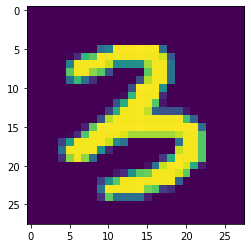

In [69]:
print(model.predict(training_x[14014:14015,:,:]))
plt.imshow(training_x[14014:14015,:,:][0])